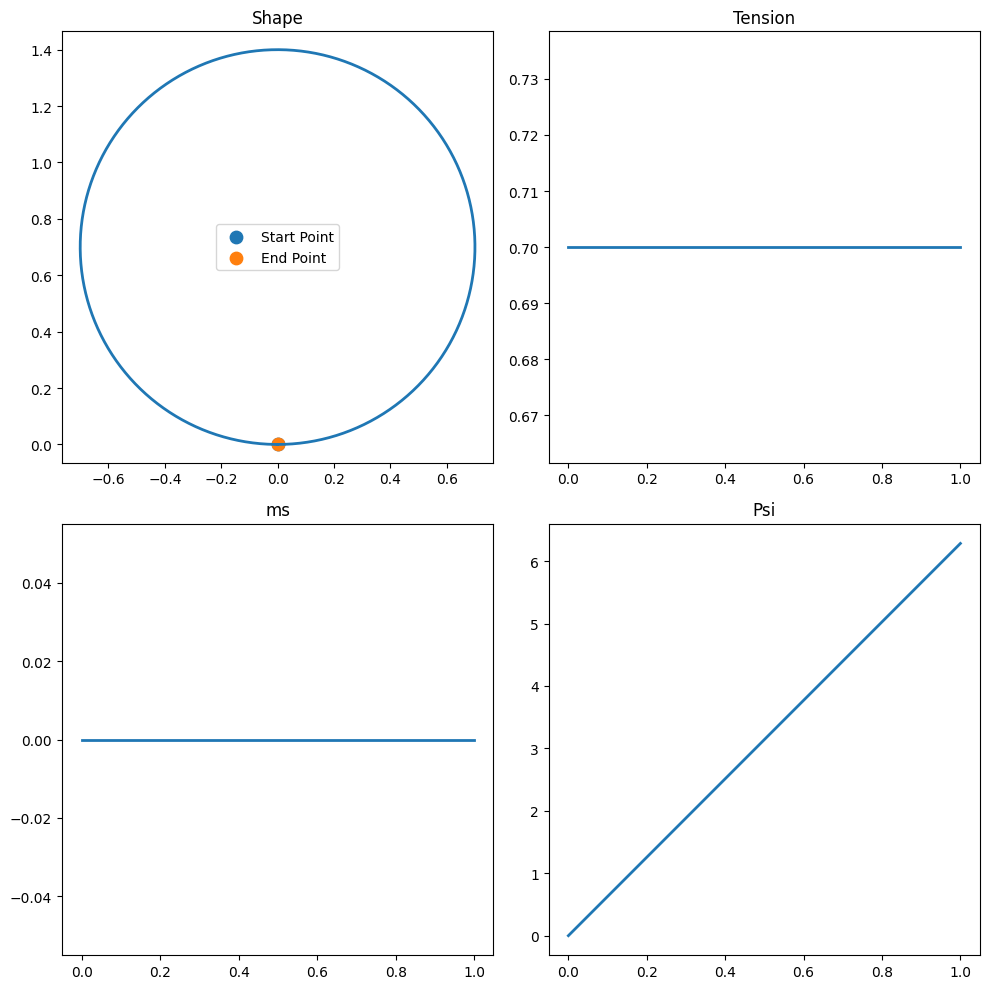

Length: 4.398229715025705


500

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

#create curve using fwd solver
sol = forward_solver(500, mag=0)
curve = sol.y[2:4]
psis_actual = sol.y[0]
L = sol.y[4, 0]
curve = curve.T
len(curve)

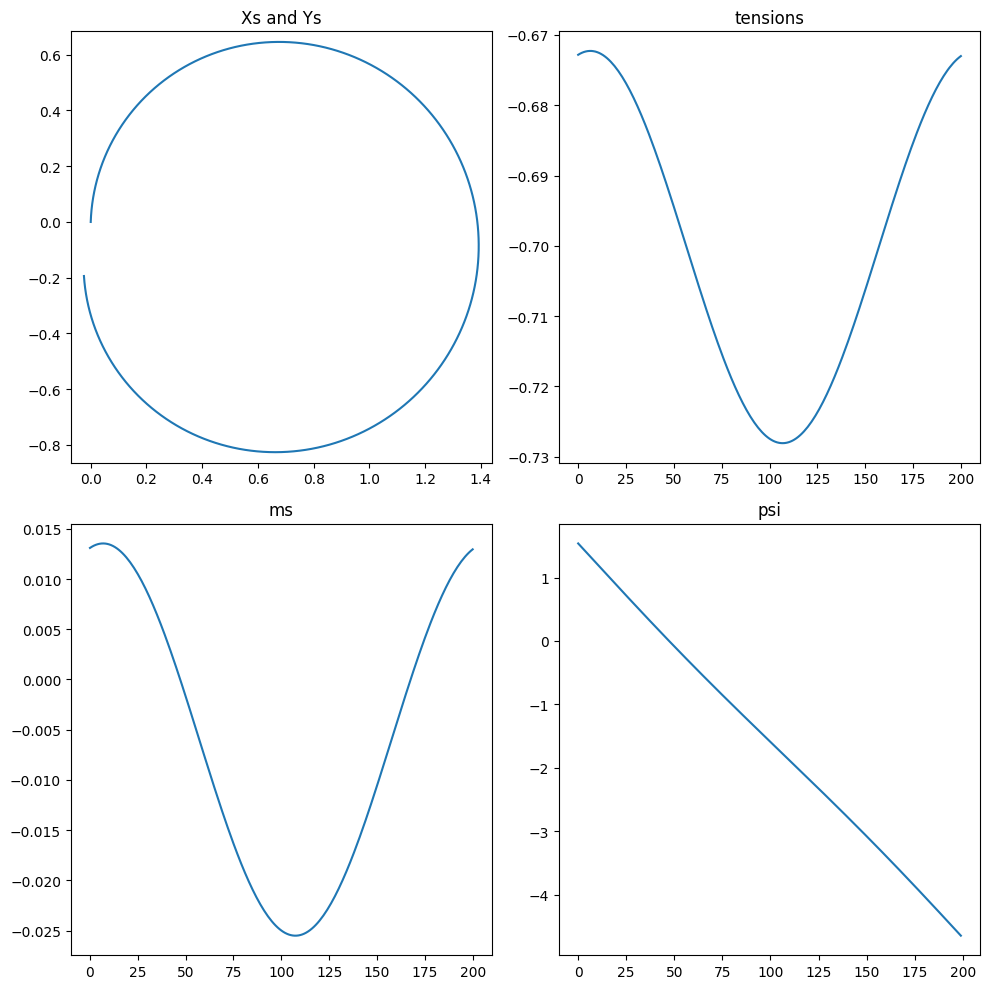

difference in psis: -6.185510967745987


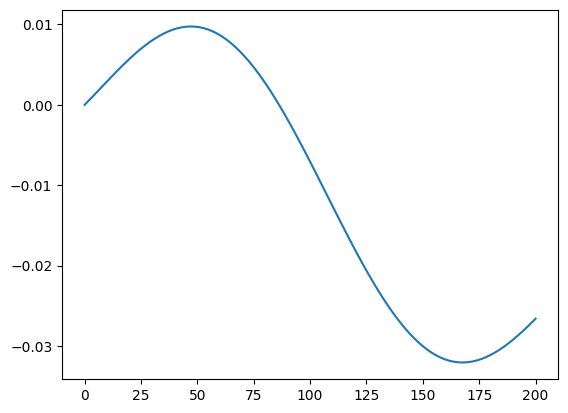

In [11]:
import scipy.integrate as sint
import numpy as np

M = 201

sigmas, ms = backward_solver(curve, L, M, population_method='2', prec=1e-8)


In [14]:
def dps(seq):
    out = np.zeros(len(seq))
    for i in range(len(seq) - 1):
        out[i] = (seq[i+1] - seq[i - 1]) / 2

    out[-1] = (seq[0] - seq[-2]) / 2
    return out

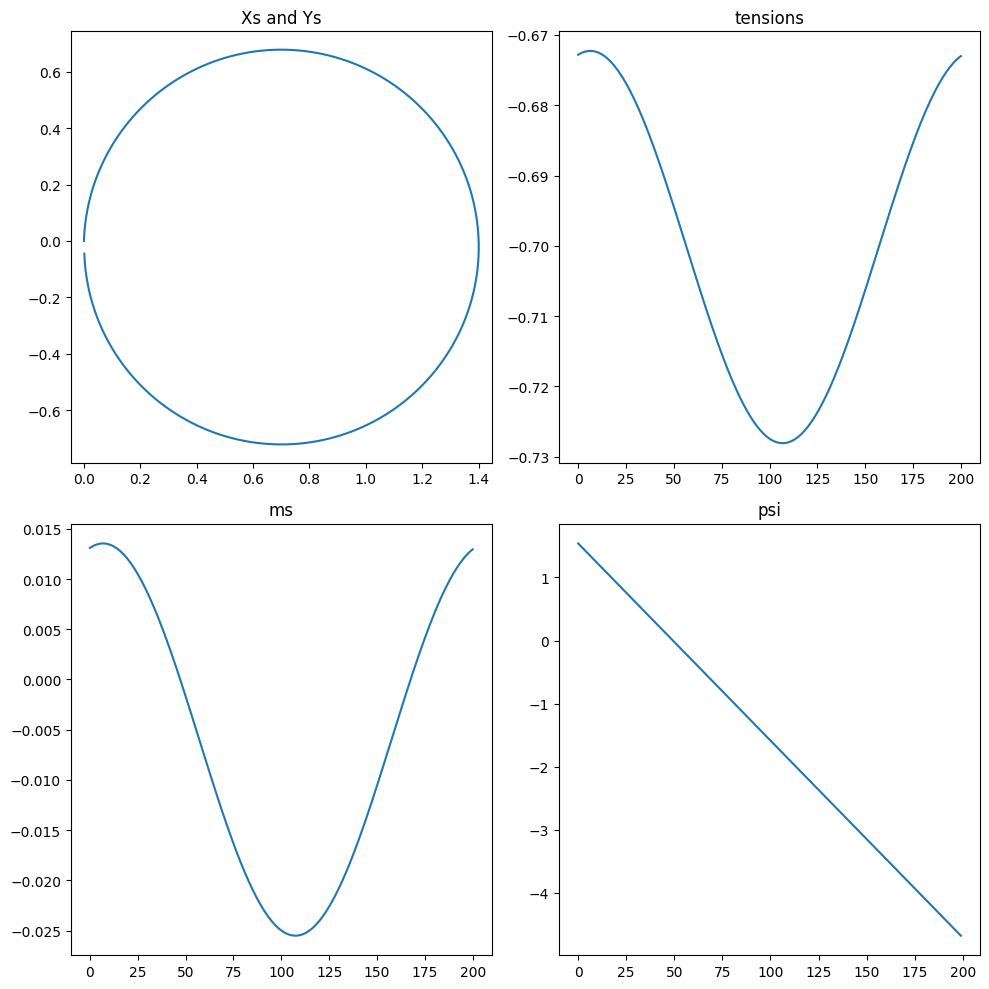

difference in psis: -6.219151989982626


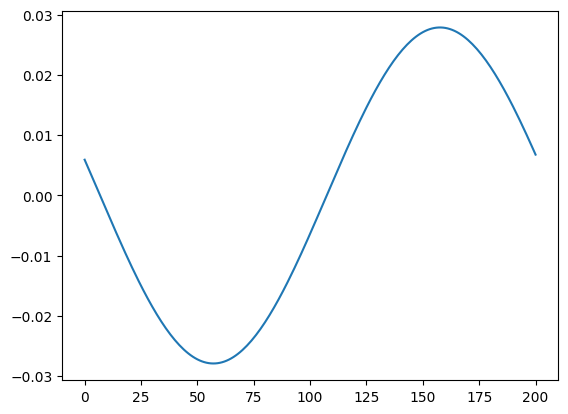

In [16]:
deltax = L / len(sigmas)

tns = dps(ms) / deltax
dtns = dps(tns) / deltax

kappas = (np.ones(len(dtns)) + dtns) / sigmas
psis = sint.cumulative_trapezoid(kappas, dx=deltax) + 0.5 * np.pi * np.ones(len(kappas)-1)
xs = sint.cumulative_trapezoid(np.cos(psis), dx=deltax, initial=0)
ys = sint.cumulative_trapezoid(np.sin(psis), dx=deltax, initial=0)

plt.figure(figsize=(10, 10))

# Plot xs and ys
plt.subplot(2,2,1)
plt.plot(xs, ys)
plt.axis('equal')
plt.title('Xs and Ys')

# Plot xs and ys
plt.subplot(2,2,2)
plt.plot(sigmas)
plt.title('tensions')

# Plot xs and ys
plt.subplot(2,2,3)
plt.plot(ms)
plt.title('ms')

# Plot xs and ys
plt.subplot(2,2,4)
plt.plot(psis)
plt.title('psi')

plt.tight_layout()
plt.show()

print(f'difference in psis: {(psis[-1] - psis[0])}')

plt.plot(tns)
plt.show()

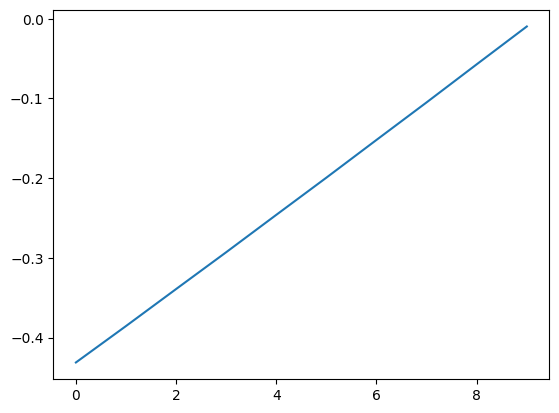

In [3]:
plt.plot(sigmas[40:50])

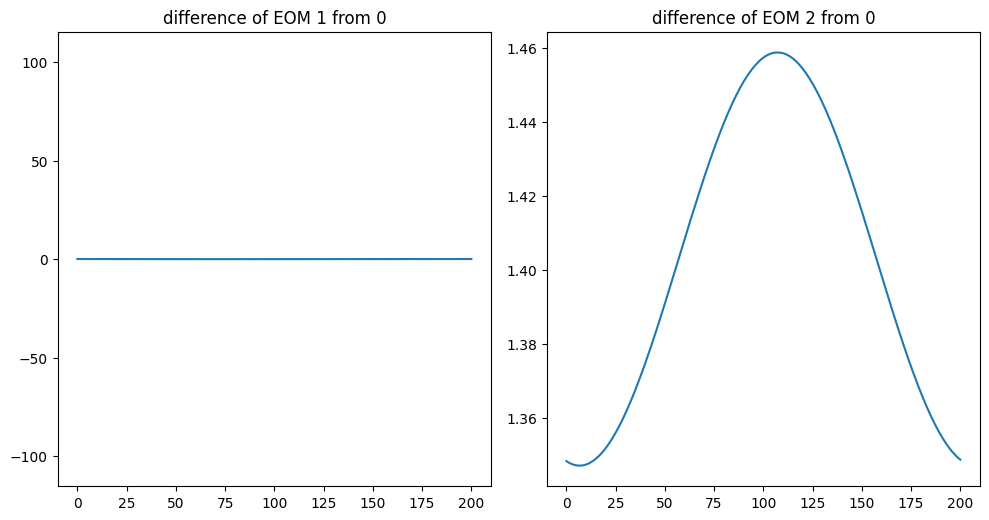

In [21]:
kappas_actual = np.diff(psis_actual) / deltax
kappas_actual = np.append(kappas_actual, kappas_actual[0])
kappas_actual = interpolate_seq_periodic(kappas_actual)(np.linspace(0, 1, M))
dsigma = dps(sigmas) / deltax

d1 = dsigma + tns * kappas_actual
d2 = dtns - sigmas * kappas_actual + 1

plt.figure(figsize=(10, 10))

# Plot xs and ys
plt.subplot(2,2,1)
plt.plot(d1)
plt.axis('equal')
plt.title('difference of EOM 1 from 0')

# Plot xs and ys
plt.subplot(2,2,2)
plt.plot(d2[:])
plt.title('difference of EOM 2 from 0')

plt.tight_layout()
plt.show()

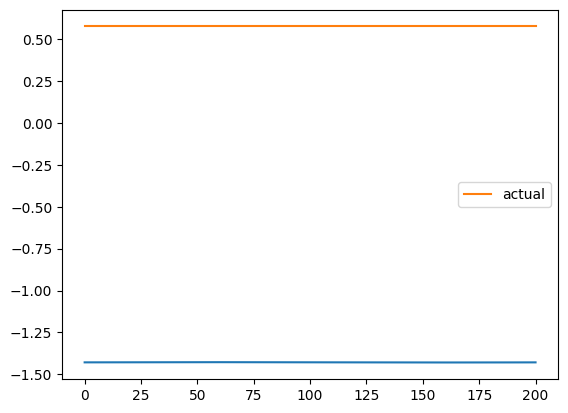

In [22]:
from cProfile import label


plt.plot(kappas)
plt.plot(kappas_actual, label='actual')
plt.legend()

In [5]:
d2[11]/d2[7]

/var/folders/tw/wwds8prs35n99xx6b_5911sh0000gn/T/ipykernel_28412/1244136234.py:1: RuntimeWarning: invalid value encountered in scalar divide
  d2[11]/d2[7]


np.float64(nan)

In [6]:
import scipy.integrate as sint
import numpy as np


sigmas, ms = backward_solver(curve, L, 100, population_method='2', prec=1e-7)

deltax = L / len(sigmas)

tns = sint.cumulative_trapezoid(ms, dx=deltax, initial=0)
dtns = np.diff(tns)
z = sigmas[0] - sigmas[-1]
dtns = np.append(dtns, z)

dtns /= deltax

kappas = (np.ones(len(dtns)) + dtns) / sigmas
psis = sint.cumulative_trapezoid(kappas, dx=deltax) + 0.5 * np.pi * np.ones(len(kappas)-1)
xs = sint.cumulative_trapezoid(np.cos(psis), dx=deltax, initial=0)
ys = sint.cumulative_trapezoid(np.sin(psis), dx=deltax, initial=0)

plt.figure(figsize=(10, 10))

# Plot xs and ys
plt.subplot(2,2,1)
plt.plot(xs, ys)
plt.axis('equal')
plt.title('Xs and Ys')

# Plot xs and ys
plt.subplot(2,2,2)
plt.plot(sigmas)
plt.title('tensions')

# Plot xs and ys
plt.subplot(2,2,3)
plt.plot(ms)
plt.title('ms')

# Plot xs and ys
plt.subplot(2,2,4)
plt.plot(psis)
plt.title('psi')

plt.tight_layout()
plt.show()

print(f'difference in psis: {(psis[-1] - psis[0])}')

plt.plot(tns)
plt.show()


KeyboardInterrupt: 

In [25]:
import numpy as np

import matplotlib.pyplot as plt

# Create a colormap
cmap = plt.get_cmap('viridis')

# Generate a sequence of colors
num_colors = 10  # Adjust this number based on how many colors you need
colors = [cmap(i / num_colors) for i in range(num_colors)]

In [26]:
N= len(curve)
print(N)

sigmas_array = []

for i in range(1):
    if i !=0:
        curve_copy = augment_curve(curve, N).copy()
    
    sigmas, ms = backward_solver(curve_copy, L, N, 0.00001)
    sigmas_array.append(sigmas)
    N = int(1.1*N)

500


ValueError: `x` must be strictly increasing sequence.

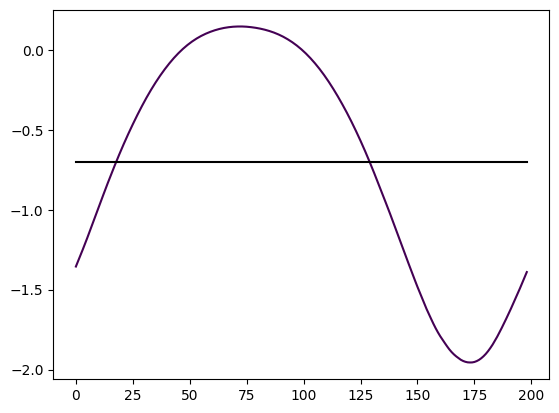

In [ ]:
for i in range(1):
    if i != 2:
        mean = np.mean(sigmas_array[i], axis=0) * np.ones_like(sigmas_array[i])
        plt.plot(sigmas_array[i], label='sigma', color=colors[i])
        plt.plot(mean, label='mean', color='black')

In [ ]:
sigmas, ms = backward_solver(curve, L, N, 0.00001)

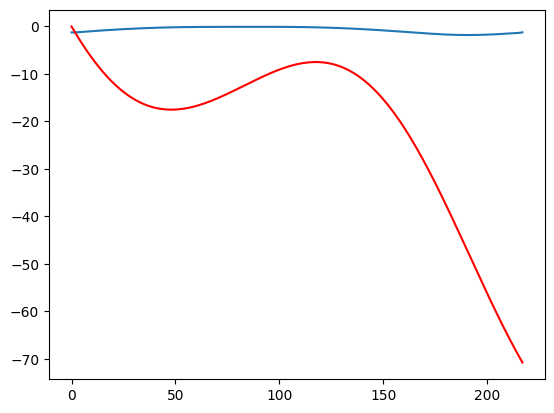

In [ ]:
from scipy import integrate as sint

plt.plot(sigmas, label='sigma')
tns = sint.cumulative_trapezoid(ms, dx = 1, initial=0)
plt.plot(tns, color='red')

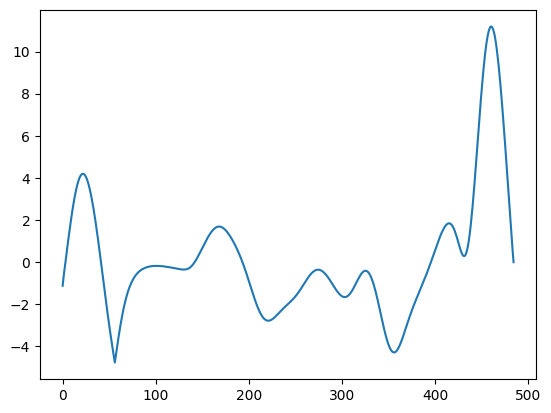

In [ ]:
plt.plot(sigmas)

In [ ]:
print(sigmas[-1])
ms[-4]

-0.002339332166930947


np.float64(-0.0007385672921449403)

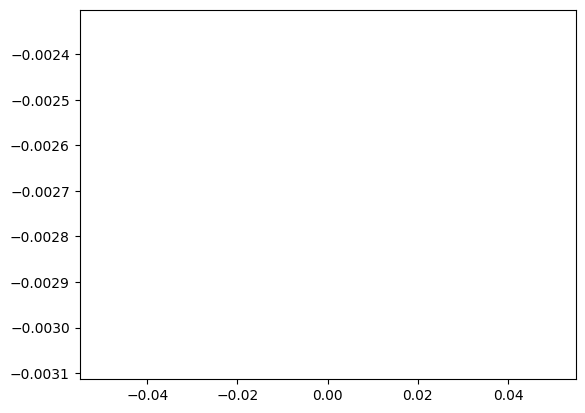

In [ ]:
plt.plot(sigmas[-1], label='sigma', color='red')
plt.plot(ms[-1], label='m', color='blue')

### We have decent looking continuity of the solution for increasing number of points, and it seems that the displacements being random does not affect the solution.

In [ ]:
N= len(curve)
print(N)

sigmas_array = []

for i in range(4):
    curve_copy = augment_curve(curve, N).copy()
    
    sigmas, ms = backward_solver(curve_copy, L, N, 0.00001)
    sigmas_array.append(sigmas)
    N = int(1*N)

365


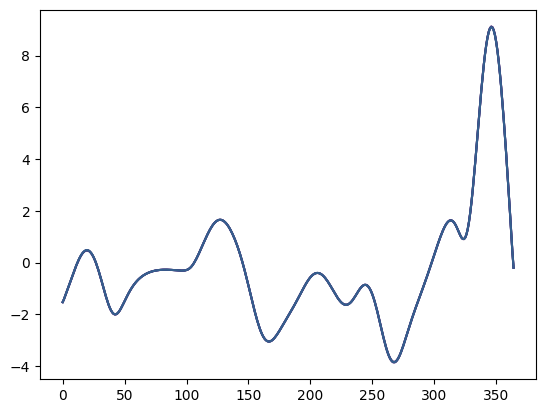

In [ ]:
for i in range(4):
    mean = np.mean(sigmas_array[i], axis=0) * np.ones_like(sigmas_array[i])
    plt.plot(sigmas_array[i], label='sigma', color=colors[i])

# Sorting out end divergence

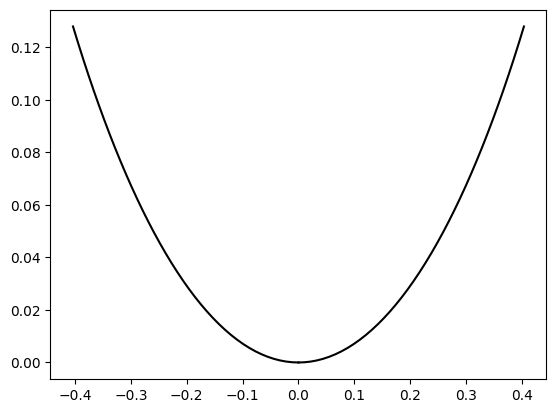

In [14]:
from helper_functions import *

N = 400
curve = augment_curve(curve, N)

plt.plot(curve[-40:, 0], curve[-40:, 1], color='black')
plt.plot(curve[:40, 0], curve[:40, 1], color='black')

In [ ]:
plt.scatter(vdisps[:, 0], vdisps[:, 1], color='green')

NameError: name 'vdisps' is not defined

In [ ]:
A[-2:]

array([[ 6.40569468e-08, -3.62035421e-06,  0.00000000e+00, ...,
        -5.16372398e-06, -2.74812709e-07,  8.95449721e-06],
       [ 6.17080819e-08, -3.94662066e-06,  0.00000000e+00, ...,
        -5.64000123e-06, -2.65492486e-07,  9.75144689e-06]])

In [ ]:
curve[-2:]

array([[-0.1318821 ,  0.01585517],
       [-0.02188173,  0.00057947]])

In [ ]:
curve[:2]

array([[ 7.43271411e-20, -3.27948162e-20],
       [ 1.09568297e-01,  1.60491322e-02]])

### ok it seems that it's because of how close together the first and last point are.

## what if we feed it forward->backward->forward??

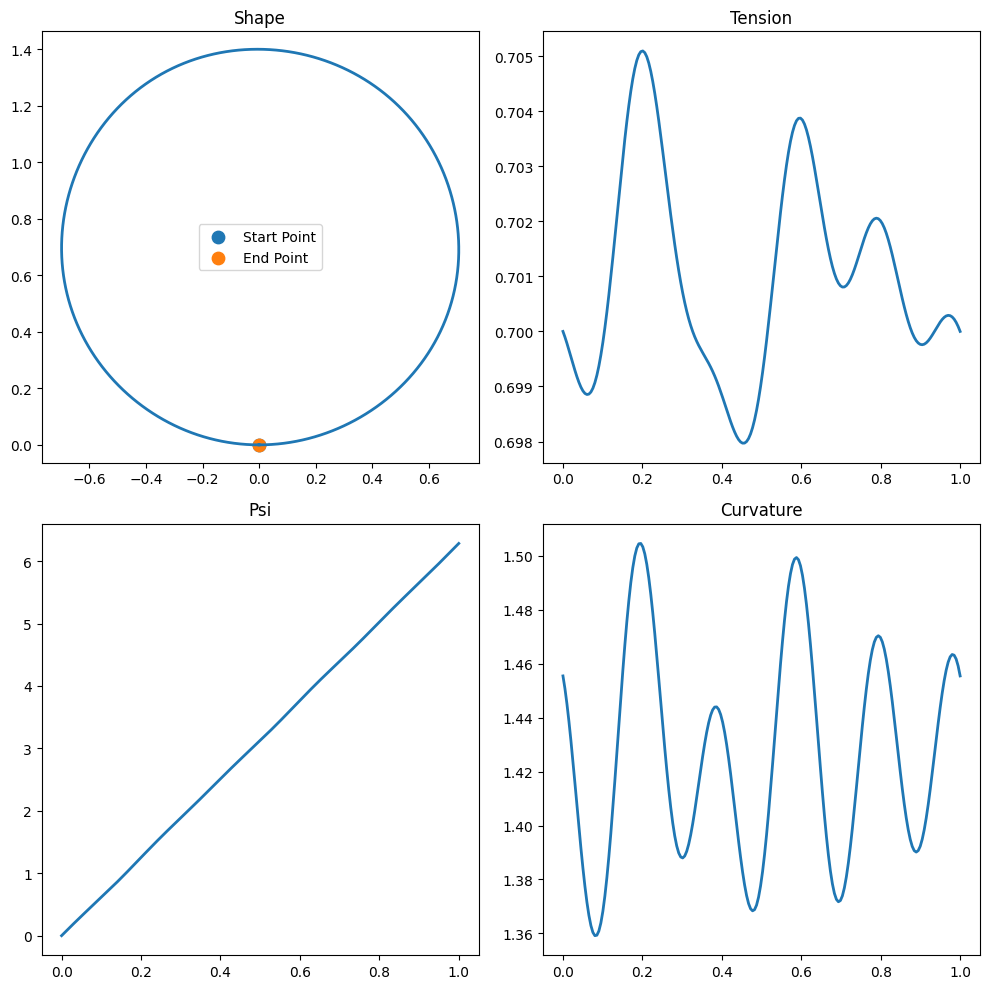

Length: 4.404735385557975


200

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from scipy import integrate as sint


#create curve using fwd solver
sol = forward_solver(mag=0.01)
curve = sol.y[2:4]
curvature = sol.y[0:2]
L = sol.y[4, 0]
curve = curve.T
curve[-1] = curve[0]

len(curve)

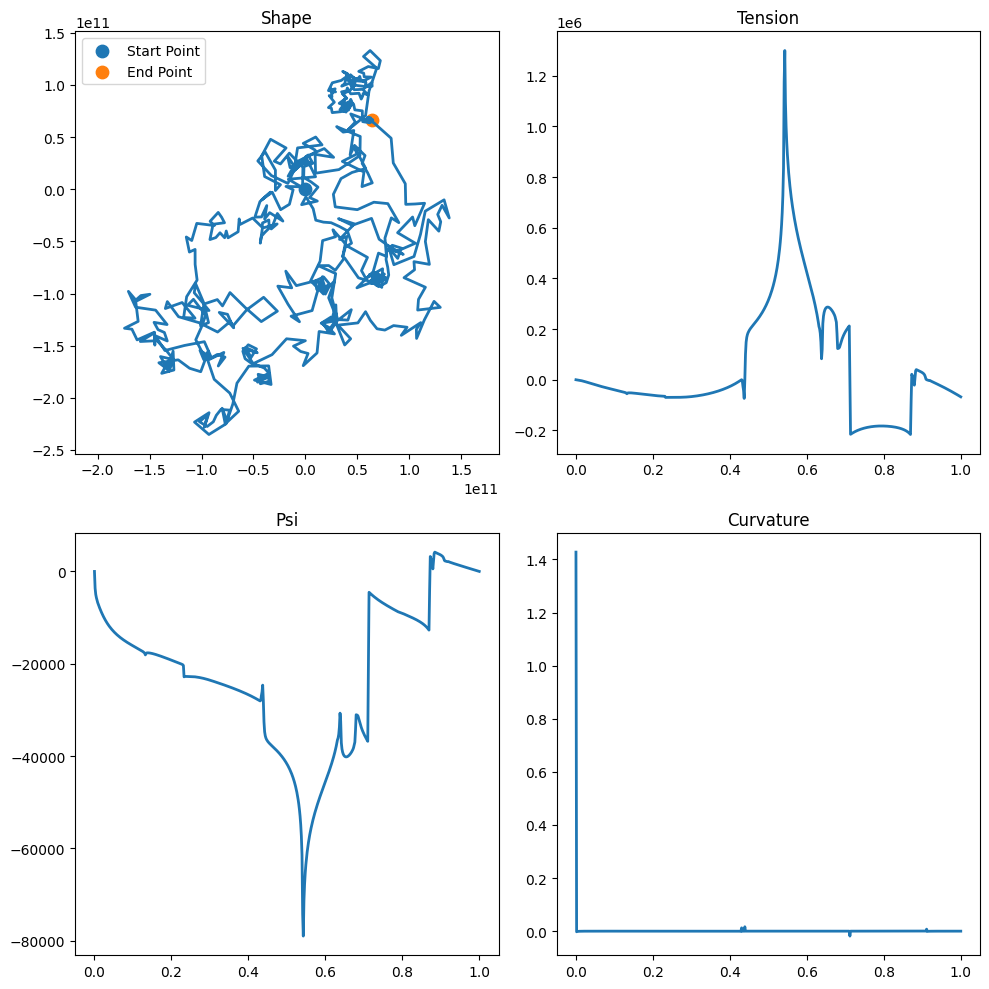

Length: 151910.83305093646


In [12]:
from helper_functions import *

N = len(curve)

curve_copy = curve.copy()
sigmas, ms = backward_solver(curve_copy, L, N, 0.00001)
tns = sint.cumulative_trapezoid(ms, dx=1, initial=0)

sol = forward_solver(tns=tns)
reconstructed_curve = sol.y[2:4]
curvature = sol.y[0:2]
L = sol.y[4, 0]
reconstructed_curve = reconstructed_curve.T[:-1]

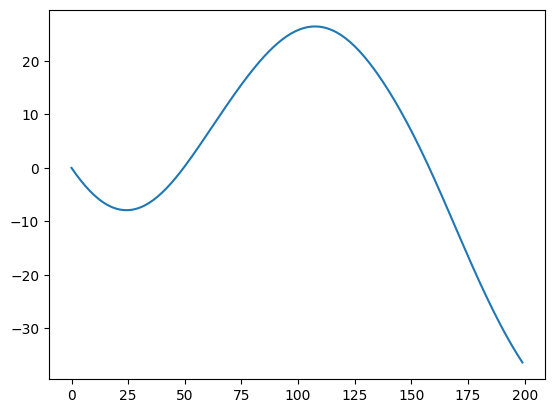

In [13]:
plt.plot(tns)

In [14]:
len(tns)

201

In [15]:
linear = np.linspace(0, 1, N)
np.gradient(linear ** 2, linear)

array([0.00502513, 0.01005025, 0.0201005 , 0.03015075, 0.04020101,
       0.05025126, 0.06030151, 0.07035176, 0.08040201, 0.09045226,
       0.10050251, 0.11055276, 0.12060302, 0.13065327, 0.14070352,
       0.15075377, 0.16080402, 0.17085427, 0.18090452, 0.19095477,
       0.20100503, 0.21105528, 0.22110553, 0.23115578, 0.24120603,
       0.25125628, 0.26130653, 0.27135678, 0.28140704, 0.29145729,
       0.30150754, 0.31155779, 0.32160804, 0.33165829, 0.34170854,
       0.35175879, 0.36180905, 0.3718593 , 0.38190955, 0.3919598 ,
       0.40201005, 0.4120603 , 0.42211055, 0.4321608 , 0.44221106,
       0.45226131, 0.46231156, 0.47236181, 0.48241206, 0.49246231,
       0.50251256, 0.51256281, 0.52261307, 0.53266332, 0.54271357,
       0.55276382, 0.56281407, 0.57286432, 0.58291457, 0.59296482,
       0.60301508, 0.61306533, 0.62311558, 0.63316583, 0.64321608,
       0.65326633, 0.66331658, 0.67336683, 0.68341709, 0.69346734,
       0.70351759, 0.71356784, 0.72361809, 0.73366834, 0.74371